In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sirtipy as sp
import astropy.units as u
import astropy.constants as const

In [3]:
wavelength = np.geomspace(10**-6.5, 10, 100)
frequencies = [const.c.to(u.cm/u.s).value/w for w in wavelength]

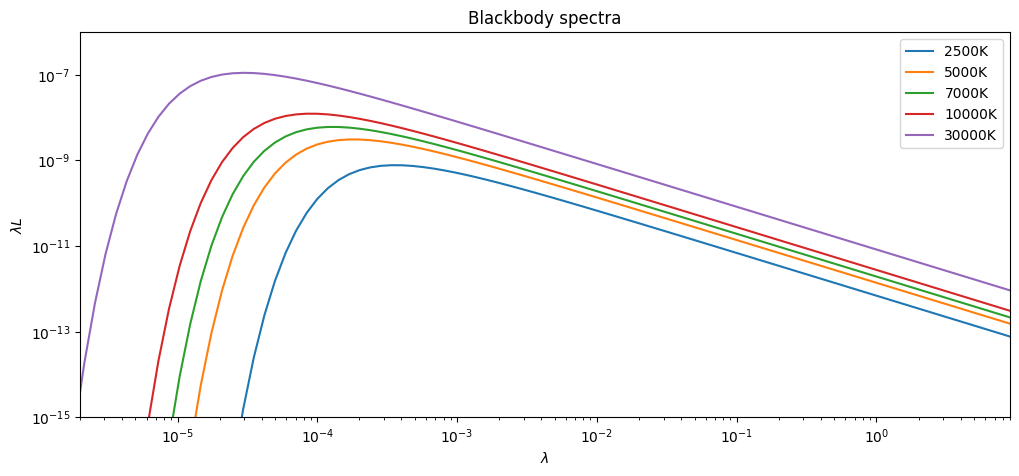

In [36]:
#Ts = np.linspace(2500,)
Ts = [2500, 5000, 7000, 10000, 30000]
fig,ax = plt.subplots(figsize=(12,5))
for T in Ts:
    bb = [const.c.cgs.value/f*sp.blackbody_intensity(T, f) for f in frequencies]
    plt.plot(wavelength, bb, label=f'{T}K')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(1e-15,1e-6)
    plt.xlim(0.2e-5, 0.9e1)
    plt.legend()
    plt.ylabel(r'$\lambda L$')
    plt.xlabel(r'$\lambda$')
    plt.title('Blackbody spectra')
    plt.savefig('examplebb.png')

In [4]:
def Kroupa01_IMF(M):
    if M < 0.08:
        return M**-0.3
    if M < 0.5:
        return M**-1.3
    if M < 1:
        return M**-2.3
    return M**-2.7

def M_from_T(T):
    L = (T/5700)**4
    return L**(1/3.5)

def T_from_M(M):
    if M >= 55:
        L = 32000*M
    if M < 55:
        L = 1.4*M**3.5
    if M < 2:
        L = M**4
    if M < 0.43:
        L = 0.23*M**2.3
    
    R = M
    if M >= 1.7:
        R = M**(1/2)
    return 5700*L**(1/4)/R**(1/2)

def T_from_M_simple(M):
    T = 5700*M**(2.5/4)
    return T

def Balmer(T, f):
    if T<=10000:
        l = const.c.to(u.nm/u.s).value/f
        if l < 364.5:
            return 0.01
    return 1

def IMF_T(T):
    M = M_from_T(T)
    return Kroupa01_IMF(M)

def IMF(M):
    return Kroupa01_IMF(M)

def dM(T):
    return 4/3.5 * T**(0.5/3.5)

def dt(M):
    return -10**10/3.5 * M**(-4.5/3.5)

def Mmax_from_time(t):
    return (10**10/t)**(1/2.5)

def gal_blackbody_T(f, Mmax=120):
    M = np.geomspace(0.05,Mmax)
    T = [T_from_M(m) for m in M]
    BB = [Balmer(t,f)*IMF_T(t)*dM(t)*sp.blackbody_intensity(t,f) for t in T]
    return np.trapz(BB, x=T)

def gal_blackbody(f, Mmax=120):
    M = np.geomspace(0.05,Mmax)
    BB = [Balmer(T_from_M(m),f)*IMF(m)*dM(T_from_M(m))*sp.blackbody_intensity(T_from_M(m),f) for m in M]
    return np.trapz(BB, x=M)

def star_formation_blackbody(f, t1, t2):
    tstart = np.max([t1,t2])
    tstop = np.min([t1,t2])
    time = np.linspace(tstart, tstop, 20)
    Mmax = [Mmax_from_time(t) for t in time]
    BB = [-1*gal_blackbody(f, M)*dt(M) for (t,M) in zip(time, Mmax)]
    return np.trapz(BB,x=Mmax)

In [11]:
Max_Mass = Mmax_from_time(12e9)
T_from_M(Max_Mass), const.c.to(u.nm/u.s).value/(frequencies[27])

(5495.897272814976, 351.11917342151264)

In [12]:
M = np.geomspace(0.05,120)
T = [T_from_M(m) for m in M]


In [13]:
T = 8000
test_bb = [Balmer(T,f)*sp.blackbody_intensity(T,f) for f in frequencies]

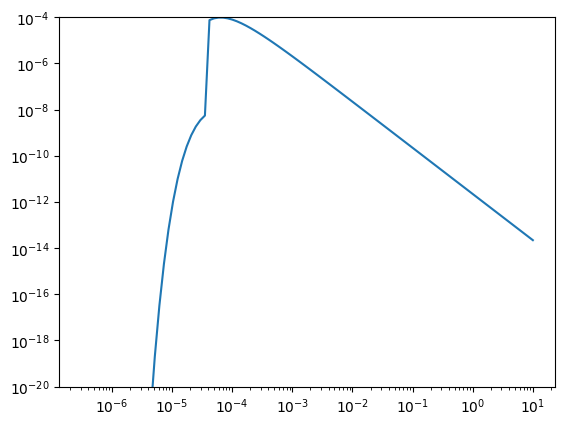

In [14]:
plt.plot(wavelength, test_bb)
#plt.xlim(10**-5.7,)
plt.ylim(10**-20,)
plt.yscale('log')
plt.xscale('log')

In [15]:
gal_bb = [gal_blackbody(f) for f in frequencies]

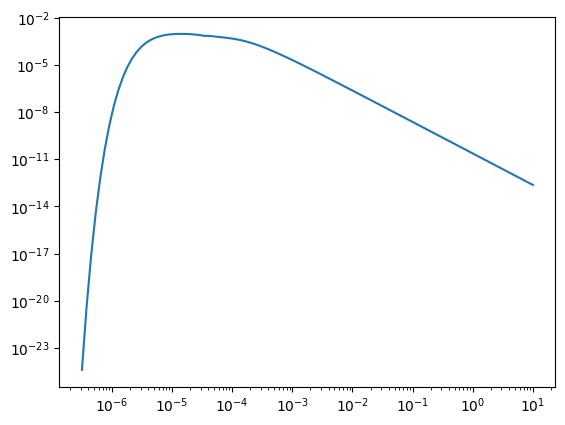

In [16]:
plt.plot(wavelength, gal_bb)
plt.yscale('log')
plt.xscale('log')

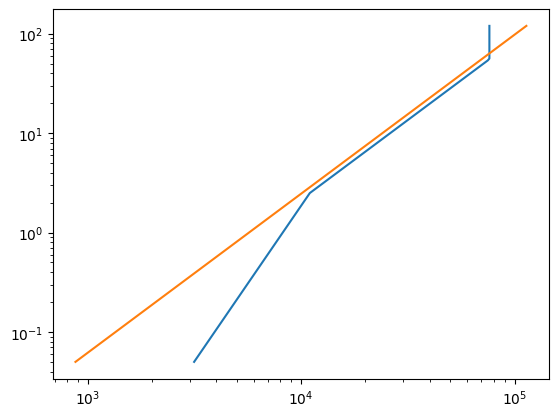

In [25]:
Masses = np.linspace(0.05, 120)
Ts = [T_from_M(m) for m in Masses]
T2 = [T_from_M_simple(m) for m in Masses]
plt.plot(Ts, Masses)
plt.plot(T2, Masses)
plt.xscale('log')
plt.yscale('log')

In [18]:
T_from_M(Mmax_from_time(0.3*10**9))

14897.95132193299

In [19]:
# Galaxy that underwent star formation from 5 Gya until 4.8 Gya

gal_bb_sf = [f*star_formation_blackbody(f, 5*10**9, 4.8*10**9) for f in frequencies]

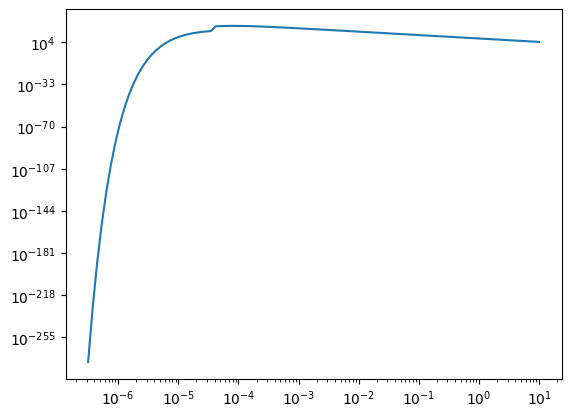

In [23]:
plt.plot(wavelength, gal_bb_sf)
#plt.ylim(10**-9, 10**8)
plt.yscale('log')
plt.xscale('log')

In [21]:
# Three galaxies
# 300 to 200 million YA
# 300 to 100 million YA
# 400 to 200 million YA
gal_bb_sf1 = [f*star_formation_blackbody(f, 3*10**9, 2.5*10**9) for f in frequencies]
gal_bb_sf2 = [f*star_formation_blackbody(f, 3*10**9, 2.75*10**9) for f in frequencies]
gal_bb_sf3 = [f*star_formation_blackbody(f, 3*10**9, 2.95*10**9) for f in frequencies]

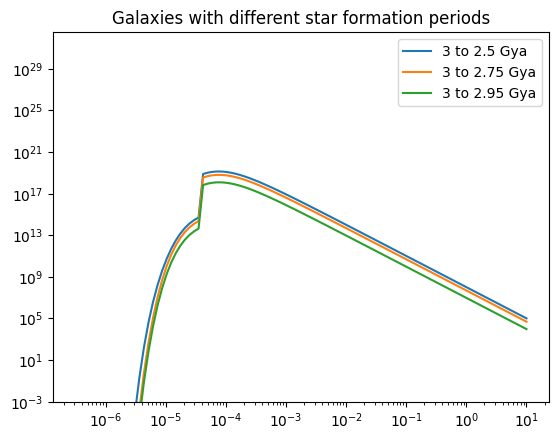

In [22]:
plt.title('Galaxies with different star formation periods')
plt.plot(wavelength, gal_bb_sf1, label='3 to 2.5 Gya')
plt.plot(wavelength, gal_bb_sf2, label='3 to 2.75 Gya')
plt.plot(wavelength, gal_bb_sf3, label='3 to 2.95 Gya')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3, )
plt.legend()

In [5]:
# Three galaxies that had 200 million years of star formation starting:
# 500 Mya
# 2 Gya
# 5 Gya

gal_bb_sf1 = [const.c.cgs.value/f*star_formation_blackbody(f, 0.5*10**9, 0.3*10**9) for f in frequencies]
gal_bb_sf2 = [const.c.cgs.value/f*star_formation_blackbody(f, 2*10**9, 1.8*10**9) for f in frequencies]
gal_bb_sf3 = [const.c.cgs.value/f*star_formation_blackbody(f, 10*10**9, 9.8*10**9) for f in frequencies]

/Users/peter/Desktop/AY 640/Project/ay640project/sirtipy.py:391: RuntimeWarning: overflow encountered in exp
  return 2. * h_over_csquared * freq**3 / (np.exp(h_over_k * freq / temperature) - 1.)


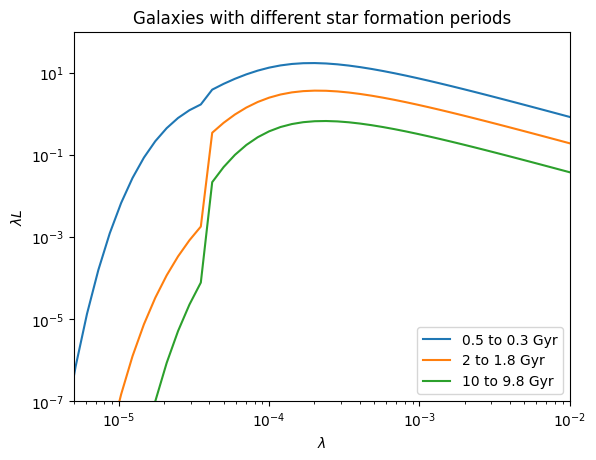

In [16]:
plt.title('Galaxies with different star formation periods')
plt.plot(wavelength, gal_bb_sf1, label='0.5 to 0.3 Gyr')
plt.plot(wavelength, gal_bb_sf2, label='2 to 1.8 Gyr')
plt.plot(wavelength, gal_bb_sf3, label='10 to 9.8 Gyr')
plt.ylabel(r'$\lambda L$')
plt.xlabel(r'$\lambda$')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7,1e2)
plt.xlim(0.5e-5, 1e-2)
plt.legend()
plt.savefig('examplesfrperiods.png')